In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
df = pd.read_csv('modeling_data.csv')

In [7]:
df.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,...,baths_4.5,baths_4.75,baths_5.0,baths_5.25,baths_5.5,baths_5.75,baths_6.0,baths_6.5,baths_6.75,baths_7.5
0,0,221900.0,3,1.00,1180,5650,1.0,0,0,1180,...,0,0,0,0,0,0,0,0,0,0
1,1,538000.0,3,2.25,2570,7242,2.0,0,0,2170,...,0,0,0,0,0,0,0,0,0,0
2,2,180000.0,2,1.00,770,10000,1.0,0,0,770,...,0,0,0,0,0,0,0,0,0,0
3,3,604000.0,4,3.00,1960,5000,1.0,0,0,1050,...,0,0,0,0,0,0,0,0,0,0
4,4,510000.0,3,2.00,1680,8080,1.0,0,0,1680,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df = df.drop(columns=['Unnamed: 0'])

NameError: name 'train' is not defined

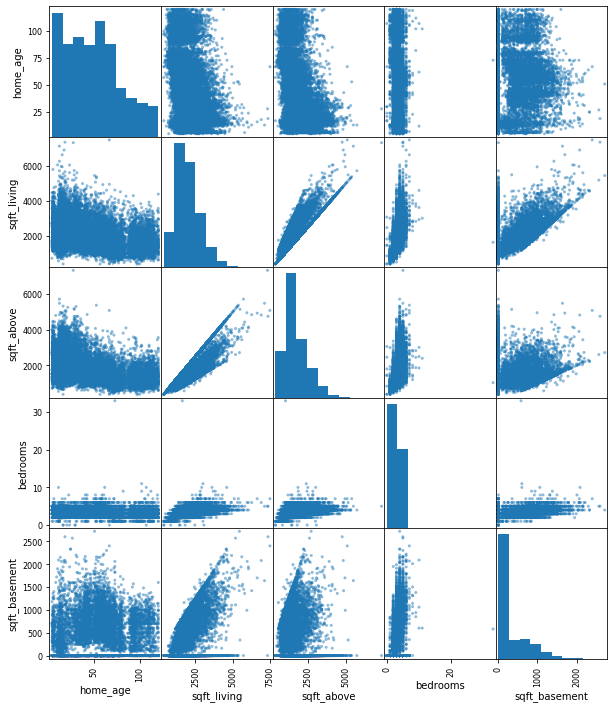

In [11]:
train, test = train_test_split(df, test_size=0.2)

x_cols = ['home_age','sqft_living','sqft_above','bedrooms', 'sqft_basement']
pd.plotting.scatter_matrix(train[x_cols], figsize=(10,12));


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     2756.
Date:                Tue, 24 Nov 2020   Prob (F-statistic):               0.00
Time:                        10:15:32   Log-Likelihood:            -2.2328e+05
No. Observations:               16616   AIC:                         4.466e+05
Df Residuals:                   16610   BIC:                         4.466e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.874e+04   6201.680      9.471      0.000    4.66e+04    7.09e+04
home_age     1586.8729     49.572     32.011      0.000    1489.706    1684.040
sqft_living   191.4483      3.430     55.822      0.000     184.726     198.171
sqft_above     33.4495      3.562      9.392      0.000      26.468      40.431
waterfront   1.989e+05   2.21e+04      9.019      0.000    1.56e+05    2.42e+05
bedrooms    -2.675e+04   1725.531    -15.504      0.000   -3.01e+04   -2.34e+04
==============================================================================
Omnibus:                     1042.721   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1400.920
Skew:                           0.572   Prob(JB):                    6.23e-305
Kurtosis:                       3.845   Cond. No.                     4.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

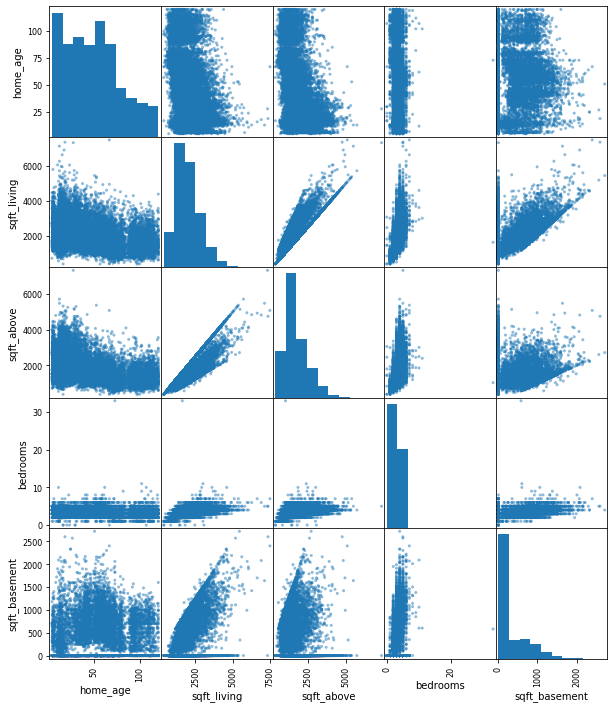

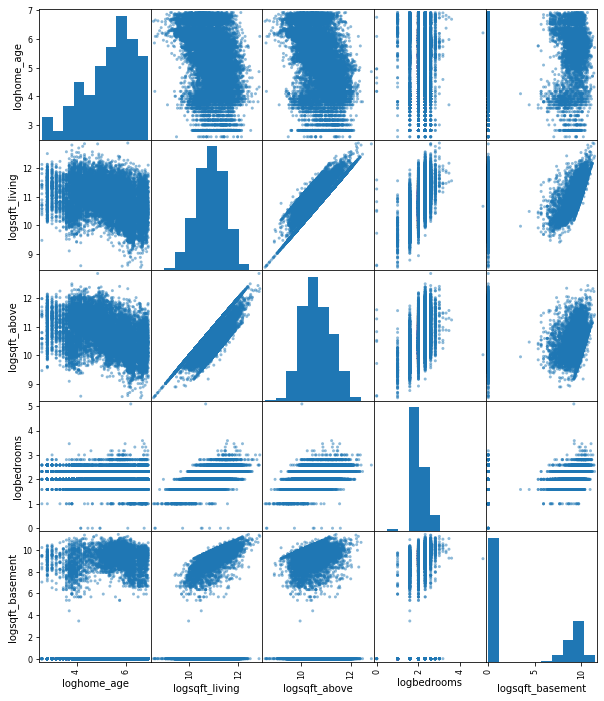

In [12]:
x_cols = ['home_age','sqft_living','sqft_above','bedrooms', 'sqft_basement']
pd.plotting.scatter_matrix(train[x_cols], figsize=(10,12));

df['loghome_age'] = np.log2(df['home_age']+1)
df['logsqft_living'] = np.log2(df['sqft_living']+1)
df['logsqft_above'] = np.log2(df['sqft_above']+1)
df['logbedrooms'] = np.log2(df['bedrooms']+1)
df['logsqft_basement'] = np.log2(df['sqft_basement']+1)
log_x_col=['loghome_age','logsqft_living','logsqft_above','logbedrooms','logsqft_basement'] 
pd.plotting.scatter_matrix(train[log_x_col], figsize=(10,12));

formula = 'price ~ home_age+sqft_living+sqft_above+waterfront+bedrooms'
model = ols(formula=formula, data=train).fit()
model.summary()

In [86]:
 from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
df[['price','home_age', 'sqft_above', 'sqft_living', 'floors', 'logsqft_basement', 'bathrooms', 'loghome_age']] = scaler.fit_transform(df[['price','home_age', 'sqft_above', 'sqft_living', 'floors', 'logsqft_basement', 'bathrooms', 'loghome_age']])
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,...,baths_5_75,baths_6_0,baths_6_5,baths_6_75,baths_7_5,loghome_age,logsqft_living,logsqft_above,logbedrooms,logsqft_basement
0,0.122672,3,0.133333,0.123783,5650,0.0,0,0,0.126600,0,...,0,0,0,0,0,0.798226,10.205793,10.205793,2.000000,0.000000
1,0.386639,3,0.300000,0.317107,7242,0.4,0,0,0.267425,400,...,0,0,0,0,0,0.817813,11.328114,11.084144,2.000000,0.757889
2,0.087683,2,0.133333,0.066759,10000,0.0,0,0,0.068279,0,...,0,0,0,0,0,0.893991,9.590587,9.590587,1.584963,0.000000
3,0.441754,4,0.400000,0.232267,5000,0.0,0,0,0.108108,910,...,0,0,0,0,0,0.743532,10.937374,10.037547,2.321928,0.861645
4,0.363257,3,0.266667,0.193324,8080,0.0,0,0,0.197724,0,...,0,0,0,0,0,0.577424,10.715104,10.715104,2.000000,0.000000


In [87]:
cols = list(df.columns)


outcome = 'price'
predictors = train.drop('price',axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [88]:
df.columns = df.columns.str.replace(r"[.]", "_")
train.columns = train.columns.str.replace(r"[.]", "_")
test.columns = test.columns.str.replace(r"[.]", "_")

In [89]:
model = ols(formula=formula, data=train).fit()
model.summary()

D:\Users\Trevor Mott\Anaconda3\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
D:\Users\Trevor Mott\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
D:\Users\Trevor Mott\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
D:\Users\Trevor Mott\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     597.1
Date:                Tue, 24 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:49:11   Log-Likelihood:            -2.1421e+05
No. Observations:               16616   AIC:                         4.287e+05
Df Residuals:                   16492   BIC:                         4.296e+05
Df Model:                         123                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -398.9163     43.269     -9.219      0.000    -483.728    -314.104
bedrooms              8897.7146   4682.770      1.900      0.057    -281.020    1.81e+04
bathrooms            -2.626e+04   1.31e+04     -1.999      0.046    -5.2e+04    -510.557
sqft_living             97.7752      3.325     29.409      0.000      91.258     104.292
sqft_lot                 0.2917      0.028     10.538      0.000       0.237       0.346
floors               -2.611e+04   6596.060     -3.958      0.000    -3.9e+04   -1.32e+04
waterfront            1.693e+05   1.42e+04     11.952      0.000    1.42e+05    1.97e+05
view                  4.541e+04   1270.713     35.736      0.000    4.29e+04    4.79e+04
sqft_above              77.0262      3.534     21.795      0.000      70.099      83.953
sqft_basement           20.7490      4.321      4.801      0.000      12.279      29.219
yr_renovated          2.328e+04   4117.834      5.653      0.000    1.52e+04    3.13e+04
zipcode                  3.0758      0.824      3.732      0.000       1.460       4.692
sqft_lot15               0.0590      0.043      1.382      0.167      -0.025       0.143
home_age               920.3731     98.217      9.371      0.000     727.857    1112.889
zip_98001            -1.998e+05   5876.474    -33.994      0.000   -2.11e+05   -1.88e+05
zip_98002            -1.987e+05   7482.890    -26.557      0.000   -2.13e+05   -1.84e+05
zip_98003            -1.935e+05   6416.839    -30.149      0.000   -2.06e+05   -1.81e+05
zip_98004             3.841e+05   8003.545     47.990      0.000    3.68e+05       4e+05
zip_98005              1.82e+05   8685.782     20.954      0.000    1.65e+05    1.99e+05
zip_98006               1.3e+05   5262.582     24.711      0.000     1.2e+05     1.4e+05
zip_98007             1.053e+05   8979.114     11.724      0.000    8.77e+04    1.23e+05
zip_98008              6.48e+04   6530.795      9.922      0.000     5.2e+04    7.76e+04
zip_98010            -1.253e+05   1.09e+04    -11.507      0.000   -1.47e+05   -1.04e+05
zip_98011            -4.594e+04   7884.503     -5.826      0.000   -6.14e+04   -3.05e+04
zip_98014            -1.135e+05   1.01e+04    -11.209      0.000   -1.33e+05   -9.37e+04
zip_98019            -1.084e+05   7952.302    -13.625      0.000   -1.24e+05   -9.28e+04
zip_98022            -2.064e+05   7067.428    -29.211      0.000    -2.2e+05   -1.93e+05
zip_98023            -2.041e+05   4932.106    -41.376      0.000   -2.14e+05   -1.94e+05
zip_98024            -6.341e+04   1.27e+04     -5.012      0.000   -8.82e+04   -3.86e+04
zip_98027             1.524e+04   5430.991      2.806      0.005    4593.809    2.59e+04
zip_98028            -4.985e+04   6336.292     -7.867      0.000   -6.23e+04   -3.74e+04
zip_98029             5.307e+04   6291.697      8.435    

In [90]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [91]:
result_final = stepwise_selection(train.drop(['price'], axis=1), train['price'], verbose=True)
print('resulting features:')
print(result_final)

D:\Users\Trevor Mott\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Add  sqft_living                    with p-value 0.0
Add  home_age                       with p-value 3.22969e-190
Add  floors                         with p-value 3.33557e-170
Add  zip_98004                      with p-value 1.00171e-174
Add  view                           with p-value 5.1818e-142
Add  zip_98040                      with p-value 2.53958e-115
Add  zip_98023                      with p-value 2.45499e-100
Add  zip_98033                      with p-value 3.63025e-97
Add  zip_98112                      with p-value 3.88864e-99
Add  zip_98042                      with p-value 3.22022e-81
Add  zip_98092                      with p-value 3.3367e-78
Add  zip_98001                      with p-value 3.19821e-81
Add  zip_98038                      with p-value 5.93002e-84
Add  zip_98003                      with p-value 3.42096e-78
Add  zip_98168                      with p-value 5.1614e-73
Add  zip_98058                      with p-value 2.35748e-75
Add  zip_98030               

D:\Users\Trevor Mott\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


Add  zip_98122                      with p-value 6.5999e-81
Add  zip_98005                      with p-value 3.29821e-80
Add  zip_98052                      with p-value 3.04094e-77
Add  zip_98116                      with p-value 1.20364e-81
Add  zip_98032                      with p-value 9.15591e-54
Add  zip_98039                      with p-value 2.556e-49
Add  zip_98188                      with p-value 5.32812e-49
Add  zip_98075                      with p-value 3.27113e-41
Add  zip_98053                      with p-value 5.93142e-43
Add  zip_98074                      with p-value 7.0825e-45
Add  zip_98144                      with p-value 5.68308e-46
Add  zip_98136                      with p-value 1.0989e-43
Add  zip_98029                      with p-value 1.67135e-42
Add  zip_98008                      with p-value 7.69336e-45
Add  zip_98007                      with p-value 4.62673e-46
Add  sqft_lot                       with p-value 3.82097e-39
Add  zip_98027               

In [92]:
outcome3 = 'price'
predictors3 = train.drop('price',axis=1)
pred_sum3 = '+'.join(predictors3[result_final[0:20]])
formula3 = outcome3 + '~' + pred_sum3

model3 = ols(formula=formula3, data=train).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     1538.
Date:                Tue, 24 Nov 2020   Prob (F-statistic):               0.00
Time:                        19:29:06   Log-Likelihood:            -2.1959e+05
No. Observations:               16616   AIC:                         4.392e+05
Df Residuals:                   16595   BIC:                         4.394e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.371e+05   4177.343     32.825      0.000    1.29e+05    1.45e+05
sqft_living   172.6696      1.430    120.755      0.000     169.867     175.472
home_age      623.2979     39.178     15.909      0.000     546.504     700.092
zip_98004    3.495e+05   1.11e+04     31.471      0.000    3.28e+05    3.71e+05
view         4.536e+04   1598.253     28.379      0.000    4.22e+04    4.85e+04
zip_98040    2.537e+05   1.09e+04     23.173      0.000    2.32e+05    2.75e+05
zip_98023   -2.236e+05   6780.125    -32.980      0.000   -2.37e+05    -2.1e+05
zip_98033    1.367e+05   7693.850     17.763      0.000    1.22e+05    1.52e+05
zip_98112      2.6e+05   1.06e+04     24.564      0.000    2.39e+05    2.81e+05
zip_98042   -1.902e+05   6556.538    -29.004      0.000   -2.03e+05   -1.77e+05
zip_98092    -2.08e+05   8120.534    -25.613      0.000   -2.24e+05   -1.92e+05
zip_98001   -2.116e+05   8146.486    -25.980      0.000   -2.28e+05   -1.96e+05
zip_98038   -1.581e+05   6321.809    -25.010      0.000    -1.7e+05   -1.46e+05
zip_98003   -2.156e+05   8887.550    -24.261      0.000   -2.33e+05   -1.98e+05
zip_98168   -1.955e+05   8821.692    -22.159      0.000   -2.13e+05   -1.78e+05
zip_98058   -1.648e+05   7118.414    -23.148      0.000   -1.79e+05   -1.51e+05
zip_98030   -2.026e+05   9358.817    -21.650      0.000   -2.21e+05   -1.84e+05
zip_98031   -1.977e+05   9139.121    -21.637      0.000   -2.16e+05    -1.8e+05
zip_98002   -2.155e+05   1.04e+04    -20.725      0.000   -2.36e+05   -1.95e+05
zip_98198   -1.936e+05   9116.114    -21.233      0.000   -2.11e+05   -1.76e+05
zip_98178   -1.925e+05   9382.988    -20.519      0.000   -2.11e+05   -1.74e+05
==============================================================================
Omnibus:                     1054.105   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2265.487
Skew:                           0.425   Prob(JB):                         0.00
Kurtosis:                       4.597   Cond. No.                     2.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
logsqft_above = train['logsqft_above']
logsqft_living = train['logsqft_living']

scaled_logsqft_above = (logsqft_above -min(logsqft_above))/(max(logsqft_above)-min(logsqft_above))
scaled_logsqft_living = (logsqft_living -min(logsqft_living))/(max(logsqft_living)-min(logsqft_living))

In [94]:
train['scaled_sqft_above'] = scaled_logsqft_above
train['scaled_sqft_living15'] = scaled_logsqft_living


D:\Users\Trevor Mott\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Users\Trevor Mott\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [95]:
outcome3 = 'price'
predictors3 = train.drop('price',axis=1)
pred_sum3 = '+'.join(predictors3)
formula3 = outcome3 + '~' + pred_sum3

model3 = ols(formula=formula3, data=train).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     597.1
Date:                Tue, 24 Nov 2020   Prob (F-statistic):               0.00
Time:                        19:29:27   Log-Likelihood:            -2.1421e+05
No. Observations:               16616   AIC:                         4.287e+05
Df Residuals:                   16492   BIC:                         4.296e+05
Df Model:                         123                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -398.9163     43.269     -9.219      0.000    -483.728    -314.104
bedrooms              8897.7146   4682.770      1.900      0.057    -281.020    1.81e+04
bathrooms            -2.626e+04   1.31e+04     -1.999      0.046    -5.2e+04    -510.557
sqft_living             97.7752      3.325     29.409      0.000      91.258     104.292
sqft_lot                 0.2917      0.028     10.538      0.000       0.237       0.346
floors               -2.611e+04   6596.060     -3.958      0.000    -3.9e+04   -1.32e+04
waterfront            1.693e+05   1.42e+04     11.952      0.000    1.42e+05    1.97e+05
view                  4.541e+04   1270.713     35.736      0.000    4.29e+04    4.79e+04
sqft_above              77.0262      3.534     21.795      0.000      70.099      83.953
sqft_basement           20.7490      4.321      4.801      0.000      12.279      29.219
yr_renovated          2.328e+04   4117.834      5.653      0.000    1.52e+04    3.13e+04
zipcode                  3.0758      0.824      3.732      0.000       1.460       4.692
sqft_lot15               0.0590      0.043      1.382      0.167      -0.025       0.143
home_age               920.3731     98.217      9.371      0.000     727.857    1112.889
zip_98001            -1.998e+05   5876.474    -33.994      0.000   -2.11e+05   -1.88e+05
zip_98002            -1.987e+05   7482.890    -26.557      0.000   -2.13e+05   -1.84e+05
zip_98003            -1.935e+05   6416.839    -30.149      0.000   -2.06e+05   -1.81e+05
zip_98004             3.841e+05   8003.545     47.990      0.000    3.68e+05       4e+05
zip_98005              1.82e+05   8685.782     20.954      0.000    1.65e+05    1.99e+05
zip_98006               1.3e+05   5262.582     24.711      0.000     1.2e+05     1.4e+05
zip_98007             1.053e+05   8979.114     11.724      0.000    8.77e+04    1.23e+05
zip_98008              6.48e+04   6530.795      9.922      0.000     5.2e+04    7.76e+04
zip_98010            -1.253e+05   1.09e+04    -11.507      0.000   -1.47e+05   -1.04e+05
zip_98011            -4.594e+04   7884.503     -5.826      0.000   -6.14e+04   -3.05e+04
zip_98014            -1.135e+05   1.01e+04    -11.209      0.000   -1.33e+05   -9.37e+04
zip_98019            -1.084e+05   7952.302    -13.625      0.000   -1.24e+05   -9.28e+04
zip_98022            -2.064e+05   7067.428    -29.211      0.000    -2.2e+05   -1.93e+05
zip_98023            -2.041e+05   4932.106    -41.376      0.000   -2.14e+05   -1.94e+05
zip_98024            -6.341e+04   1.27e+04     -5.012      0.000   -8.82e+04   -3.86e+04
zip_98027             1.524e+04   5430.991      2.806      0.005    4593.809    2.59e+04
zip_98028            -4.985e+04   6336.292     -7.867      0.000   -6.23e+04   -3.74e+04
zip_98029             5.307e+04   6291.697      8.435    

In [96]:
# Performing updated stepwise addition

result_final = stepwise_selection(train.drop(['price'], axis=1), train['price'], verbose=True)
print('resulting features:')
print(result_final)

Add  sqft_living                    with p-value 0.0
Add  home_age                       with p-value 3.22969e-190
Add  floors                         with p-value 3.33557e-170
Add  zip_98004                      with p-value 1.00171e-174
Add  view                           with p-value 5.1818e-142
Add  zip_98040                      with p-value 2.53958e-115
Add  zip_98023                      with p-value 2.45499e-100
Add  zip_98033                      with p-value 3.63025e-97
Add  zip_98112                      with p-value 3.88864e-99
Add  zip_98042                      with p-value 3.22022e-81
Add  zip_98092                      with p-value 3.3367e-78
Add  zip_98001                      with p-value 3.19821e-81
Add  zip_98038                      with p-value 5.93002e-84
Add  zip_98003                      with p-value 3.42096e-78
Add  zip_98168                      with p-value 5.1614e-73
Add  zip_98058                      with p-value 2.35748e-75
Add  zip_98030               

D:\Users\Trevor Mott\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


Add  zip_98122                      with p-value 6.5999e-81
Add  zip_98005                      with p-value 3.29821e-80
Add  zip_98052                      with p-value 3.04094e-77
Add  zip_98116                      with p-value 1.20364e-81
Add  zip_98032                      with p-value 9.15591e-54
Add  zip_98039                      with p-value 2.556e-49
Add  zip_98188                      with p-value 5.32812e-49
Add  zip_98075                      with p-value 3.27113e-41
Add  zip_98053                      with p-value 5.93142e-43
Add  zip_98074                      with p-value 7.0825e-45
Add  zip_98144                      with p-value 5.68308e-46
Add  zip_98136                      with p-value 1.0989e-43
Add  zip_98029                      with p-value 1.67135e-42
Add  zip_98008                      with p-value 7.69336e-45
Add  zip_98007                      with p-value 4.62673e-46
Add  sqft_lot                       with p-value 3.82097e-39
Add  zip_98027               

In [29]:
outcome3 = 'price'
predictors3 = train.drop('price',axis=1)
pred_sum3 = '+'.join(predictors3[result_final])
formula3 = outcome3 + '~' + pred_sum3

model3 = ols(formula=formula3, data=train).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     870.7
Date:                Tue, 24 Nov 2020   Prob (F-statistic):               0.00
Time:                        10:33:24   Log-Likelihood:            -2.1425e+05
No. Observations:               16616   AIC:                         4.287e+05
Df Residuals:                   16531   BIC:                         4.293e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.359e+05   1.19e+04     11.463      0.000    1.13e+05    1.59e+05
sqft_living         93.2402      4.356     21.407      0.000      84.703     101.778
home_age           963.9798     92.962     10.370      0.000     781.764    1146.196
zip_98004         4.742e+05   8316.435     57.016      0.000    4.58e+05     4.9e+05
view              4.624e+04   1255.302     36.838      0.000    4.38e+04    4.87e+04
zip_98040         3.808e+05   8212.401     46.372      0.000    3.65e+05    3.97e+05
zip_98023        -1.141e+05   5288.817    -21.571      0.000   -1.24e+05   -1.04e+05
zip_98033         2.465e+05   5895.826     41.817      0.000    2.35e+05    2.58e+05
zip_98112         3.914e+05   8094.739     48.349      0.000    3.76e+05    4.07e+05
zip_98042        -9.352e+04   5101.747    -18.330      0.000   -1.04e+05   -8.35e+04
zip_98092        -1.192e+05   6179.743    -19.295      0.000   -1.31e+05   -1.07e+05
zip_98001          -1.1e+05   6187.147    -17.779      0.000   -1.22e+05   -9.79e+04
zip_98038        -7.363e+04   4937.972    -14.911      0.000   -8.33e+04    -6.4e+04
zip_98003        -1.035e+05   6738.922    -15.361      0.000   -1.17e+05   -9.03e+04
zip_98168        -7.313e+04   6701.722    -10.912      0.000   -8.63e+04      -6e+04
zip_98058         -5.68e+04   5507.970    -10.312      0.000   -6.76e+04    -4.6e+04
zip_98030        -1.028e+05   7036.650    -14.603      0.000   -1.17e+05    -8.9e+04
zip_98031        -8.931e+04   6902.865    -12.938      0.000   -1.03e+05   -7.58e+04
zip_98002        -1.084e+05   7784.055    -13.927      0.000   -1.24e+05   -9.32e+04
zip_98198        -8.425e+04   6889.590    -12.228      0.000   -9.78e+04   -7.07e+04
zip_98178        -6.484e+04   7093.936     -9.140      0.000   -7.87e+04   -5.09e+04
zip_98022        -1.147e+05   7311.633    -15.687      0.000   -1.29e+05      -1e+05
zip_98055        -6.674e+04   7004.418     -9.528      0.000   -8.05e+04    -5.3e+04
zip_98199         2.874e+05   6988.129     41.131      0.000    2.74e+05    3.01e+05
zip_98119         3.365e+05   8721.887     38.580      0.000    3.19e+05    3.54e+05
zip_98115         2.365e+05   5121.886     46.176      0.000    2.26e+05    2.47e+05
zip_98105         3.158e+05   8223.433     38.401      0.000       3e+05    3.32e+05
zip_98103         2.329e+05   5267.817     44.216      0.000    2.23e+05    2.43e+05
zip_98117         2.191e+05   5228.590     41.905      0.000    2.09e+05    2.29e+05
sqft_above          82.7665      4.754     17.409      0.000      73.447      92.086
zip_98006         2.209e+05   5606.001     39.407      0.000     2.1e+05    2.32e+05
zip_98102         3.578e+05   1.15e+04     31.194      0.000    3.35e+05     3.8e+05
zip_98109         3.368e+05   1.16e+04     28.939      0.000    3.14e+05     3.6e+05
zip_98107         2.397

In [98]:
zipless_train = train.drop([i for i in train if 'zip' in i], axis=1)

In [99]:
result_final = stepwise_selection(zipless_train.drop(['price'], axis=1), zipless_train['price'], verbose=True)
print('resulting features:')
print(result_final)

Add  scaled_sqft_above              with p-value 0.0
Add  sqft_basement                  with p-value 0.0
Add  logsqft_above                  with p-value 0.0
Add  home_age                       with p-value 1.04975e-202
Add  sqft_above                     with p-value 2.05657e-180
Drop logsqft_above                  with p-value 0.936998


D:\Users\Trevor Mott\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


Add  sqft_living                    with p-value 0.0
Drop scaled_sqft_above              with p-value 0.713872
Add  floors                         with p-value 1.22065e-146
Add  view                           with p-value 2.5084e-129
Add  logsqft_basement               with p-value 4.72324e-60
Add  logbedrooms                    with p-value 5.7699e-43
Drop sqft_basement                  with p-value 0.171401
Add  bathrooms                      with p-value 3.26655e-31
Add  loghome_age                    with p-value 3.30195e-27
Add  floors_3_0                     with p-value 1.1989e-20
Add  baths_6_75                     with p-value 2.21245e-07
Add  baths_4_5                      with p-value 2.18043e-06
Add  baths_6_0                      with p-value 1.98065e-06
Add  baths_3_25                     with p-value 2.48721e-05
Add  beds_1                         with p-value 3.06274e-05
Add  sqft_lot15                     with p-value 0.000851424
Add  baths_2_25                     wit

In [100]:
outcome3 = 'price'
predictors3 = train.drop('price',axis=1)
pred_sum3 = '+'.join(predictors3[result_final])
formula3 = outcome3 + '~' + pred_sum3

model3 = ols(formula=formula3, data=train).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     829.3
Date:                Tue, 24 Nov 2020   Prob (F-statistic):               0.00
Time:                        19:35:59   Log-Likelihood:            -2.2234e+05
No. Observations:               16616   AIC:                         4.447e+05
Df Residuals:                   16594   BIC:                         4.449e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          1.25e+05   1.88e+04      6.656      0.000    8.82e+04    1.62e+05
home_age          3474.6707    131.505     26.422      0.000    3216.906    3732.435
sqft_above         115.9664      7.616     15.226      0.000     101.038     130.895
sqft_living         86.2350      7.037     12.255      0.000      72.442     100.028
floors             2.62e+04   3919.514      6.685      0.000    1.85e+04    3.39e+04
view              4.521e+04   1903.510     23.749      0.000    4.15e+04    4.89e+04
logsqft_basement  8503.3745    626.410     13.575      0.000    7275.545    9731.204
bathrooms         3.524e+04   3076.155     11.457      0.000    2.92e+04    4.13e+04
loghome_age      -4.228e+04   3969.108    -10.652      0.000   -5.01e+04   -3.45e+04
floors_3_0        8.549e+04   9179.023      9.314      0.000    6.75e+04    1.03e+05
baths_6_75       -7.909e+05   1.57e+05     -5.026      0.000    -1.1e+06   -4.82e+05
baths_4_5        -9.936e+04   2.48e+04     -4.009      0.000   -1.48e+05   -5.08e+04
baths_6_0         -7.35e+05   1.57e+05     -4.676      0.000   -1.04e+06   -4.27e+05
baths_3_25        3.966e+04   8504.410      4.663      0.000     2.3e+04    5.63e+04
beds_1           -3.993e+04   1.32e+04     -3.024      0.002   -6.58e+04    -1.4e+04
sqft_lot15          -0.1622      0.048     -3.380      0.001      -0.256      -0.068
baths_2_25        1.365e+04   4263.412      3.202      0.001    5294.010     2.2e+04
baths_3_75        5.874e+04   1.84e+04      3.195      0.001    2.27e+04    9.48e+04
beds_33            1.11e+06   1.67e+05      6.661      0.000    7.83e+05    1.44e+06
bedrooms         -3.065e+04   1905.658    -16.084      0.000   -3.44e+04   -2.69e+04
beds_3           -8675.6027   2719.747     -3.190      0.001    -1.4e+04   -3344.607
baths_5_75       -4.061e+05   1.57e+05     -2.584      0.010   -7.14e+05   -9.81e+04
==============================================================================
Omnibus:                     1008.734   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1508.983
Skew:                           0.519   Prob(JB):                         0.00
Kurtosis:                       4.049   Cond. No.                     4.00e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

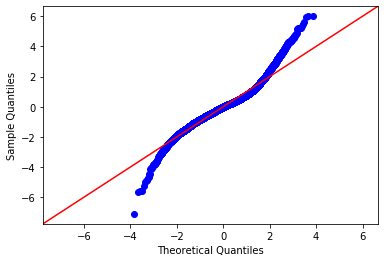

In [101]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [38]:
outcome3 = 'price'
predictors3 = train.drop('price',axis=1)
pred_sum3 = '+'.join(predictors3[result_final[:9]])
formula3 = outcome3 + '~' + pred_sum3

model3 = ols(formula=formula3, data=train).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     1850.
Date:                Tue, 24 Nov 2020   Prob (F-statistic):               0.00
Time:                        10:46:34   Log-Likelihood:            -2.2253e+05
No. Observations:               16616   AIC:                         4.451e+05
Df Residuals:                   16606   BIC:                         4.452e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         8.926e+04   1.85e+04      4.813      0.000    5.29e+04    1.26e+05
home_age          3565.9827    128.736     27.700      0.000    3313.645    3818.320
sqft_above         125.8752      7.649     16.457      0.000     110.883     140.867
sqft_living         61.4251      6.907      8.893      0.000      47.886      74.964
floors            2.963e+04   3931.788      7.536      0.000    2.19e+04    3.73e+04
view              4.802e+04   1908.334     25.164      0.000    4.43e+04    5.18e+04
logsqft_basement  9504.4055    626.890     15.161      0.000    8275.635    1.07e+04
bathrooms         2.609e+04   2940.364      8.874      0.000    2.03e+04    3.19e+04
loghome_age      -4.851e+04   3908.073    -12.412      0.000   -5.62e+04   -4.08e+04
floors_3_0        8.957e+04   9251.460      9.682      0.000    7.14e+04    1.08e+05
==============================================================================
Omnibus:                      968.317   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1418.443
Skew:                           0.511   Prob(JB):                    9.75e-309
Kurtosis:                       4.003   Cond. No.                     4.39e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,...,baths_5_75,baths_6_0,baths_6_5,baths_6_75,baths_7_5,loghome_age,logsqft_living,logsqft_above,logbedrooms,logsqft_basement
0,221900.0,3,0.133333,0.123783,5650,0.0,0,0,0.126600,0,...,0,0,0,0,0,0.798226,10.205793,10.205793,2.000000,0.000000
1,538000.0,3,0.300000,0.317107,7242,0.4,0,0,0.267425,400,...,0,0,0,0,0,0.817813,11.328114,11.084144,2.000000,0.757889
2,180000.0,2,0.133333,0.066759,10000,0.0,0,0,0.068279,0,...,0,0,0,0,0,0.893991,9.590587,9.590587,1.584963,0.000000
3,604000.0,4,0.400000,0.232267,5000,0.0,0,0,0.108108,910,...,0,0,0,0,0,0.743532,10.937374,10.037547,2.321928,0.861645
4,510000.0,3,0.266667,0.193324,8080,0.0,0,0,0.197724,0,...,0,0,0,0,0,0.577424,10.715104,10.715104,2.000000,0.000000


AttributeError: 'numpy.float64' object has no attribute 'rename'

In [66]:
df_std_name.head()

0    1.331764
1    0.113226
2    0.743554
3   -0.520000
4   -0.857865
dtype: float64

In [67]:
df_std.head()

,0,1,2,3,4,5,6
0,1.867074,-0.881910,-0.659763,-0.891584,1.129368,-0.435205,1.331764
1,-0.214724,1.909675,1.434372,0.967556,-0.781667,0.607580,0.113226
2,0.638472,-0.881910,0.180399,-0.891584,1.442579,-0.435205,0.743554
3,-0.760770,1.692551,1.232482,0.967556,-0.781667,0.607580,-0.520000
4,-0.965537,0.911717,0.506432,0.967556,-0.781667,0.607580,-0.857865
